# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [106]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv("C:/Users/kinyanjuim/Desktop/Project1_EDA_Pandas/dsc-pandas-eda-lab/data/ames.csv", index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

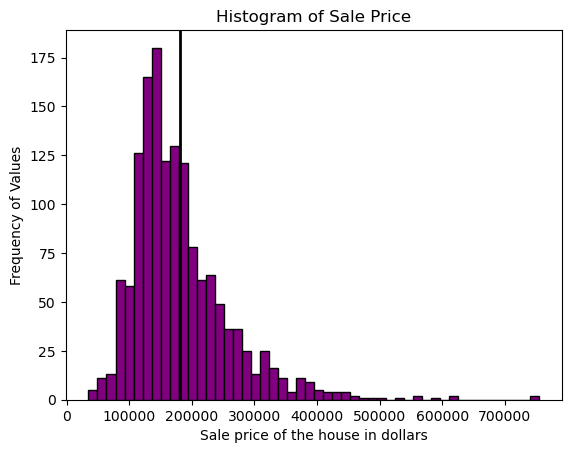

In [6]:
# Your code here
# Histogram of SalePrice

plt.hist(df['SalePrice'], bins = 50, color = "purple", edgecolor = 'black')

plt.xlabel('Sale price of the house in dollars')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Sale Price')

# Mean of Sale Price
plt.axvline(df['SalePrice'].mean(), color = "black", linewidth = 2)
plt.show()

Now, print out the mean, median, and standard deviation:

In [7]:
# Your code here
# Mean
df['SalePrice'].mean()

# Median
df['SalePrice'].median()

# Standard Deviation
df['SalePrice'].std()

79442.50288288663

In the cell below, interpret the above information.

In [8]:
# Replace None with appropriate text
"""
Mean of SalePrice is 180,921.2
Median of SalePrice is 163,000
Standard deviation of Sale Price is 79,442.5

"""

'\nMean of SalePrice is 180,921.2\nMedian of SalePrice is 163,000\nStandard deviation of Sale Price is 79,442.5\n\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

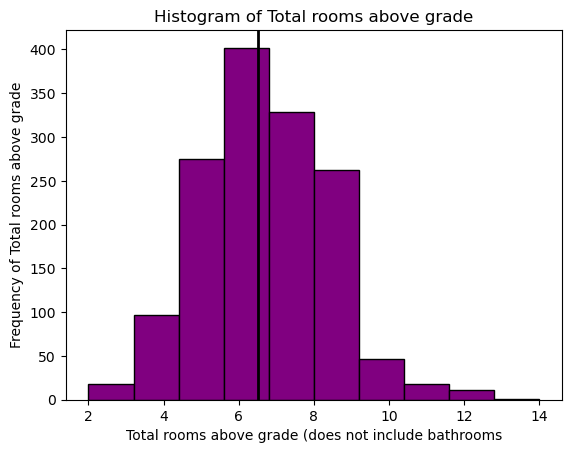

In [9]:
# Your code here
plt.hist(df['TotRmsAbvGrd'], bins = 10, color = "purple", edgecolor = "black")

plt.xlabel('Total rooms above grade (does not include bathrooms')
plt.ylabel('Frequency of Total rooms above grade')
plt.title('Histogram of Total rooms above grade')

# Mean
plt.axvline(df['TotRmsAbvGrd'].mean(), color = "black", linewidth = 2)
plt.show()

Now, print out the mean, median, and standard deviation:

In [10]:
# Your code here

# Mean
df['TotRmsAbvGrd'].mean()

# Median
df['TotRmsAbvGrd'].median()

# Standard deviation
df['TotRmsAbvGrd'].std()

1.625393290584064

In the cell below, interpret the above information.

In [11]:
# Replace None with appropriate text
"""
Mean of TotRmsAbvGrd is 6.5
Median of TotRmsAbvGrd is 6.0
Standard deviation of TotRmsAbvGrd is 1.63

"""

'\nMean of TotRmsAbvGrd is 6.5\nMedian of TotRmsAbvGrd is 6.0\nStandard deviation of TotRmsAbvGrd is 1.63\n\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

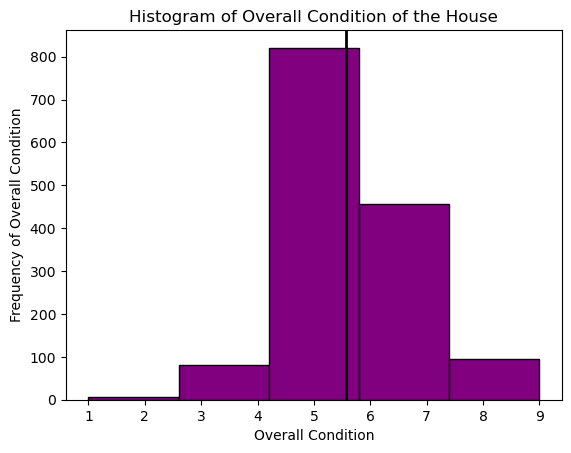

In [12]:
# Your code here

# Your code here
plt.hist(df['OverallCond'], bins = 5, color = "purple", edgecolor = "black")

plt.xlabel('Overall Condition')
plt.ylabel('Frequency of Overall Condition')
plt.title('Histogram of Overall Condition of the House')

# Mean
plt.axvline(df['OverallCond'].mean(), color = "black", linewidth = 2)
plt.show()

Now, print out the mean, median, and standard deviation:

In [13]:
# Your code here

# Mean
df['OverallCond'].mean()

# Median
df['OverallCond'].median()

# Standard deviation
df['OverallCond'].std()

1.1127993367127367

In the cell below, interpret the above information.

In [14]:
# Replace None with appropriate text
"""
Mean of OverallCond is 5.6
Median of OverallCond is 5.0
Standard deviation of OverallCond is 1.1

"""

'\nMean of OverallCond is 5.6\nMedian of OverallCond is 5.0\nStandard deviation of OverallCond is 1.1\n\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [20]:
# Replace None with appropriate code
# Create pandas DataFrame Subset Based on Logical Condition

below_average_condition = df.loc[df['OverallCond']<5]
print(below_average_condition)

average_condition = df.loc[df['OverallCond']==5]
print(average_condition)

above_average_condition = df.loc[df['OverallCond']>5]
print(above_average_condition)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
31            70  C (all)         50.0     8500   Pave  Pave      Reg   
70            50       RL         81.0    15593   Pave   NaN      Reg   
89            50  C (all)        105.0     8470   Pave   NaN      IR1   
92            20       RL         85.0     8500   Pave   NaN      Reg   
105           50       RM          NaN     7758   Pave   NaN      Reg   
...          ...      ...          ...      ...    ...   ...      ...   
1346          30       RM         50.0     6000   Pave   NaN      Reg   
1363          50       RL          NaN    12513   Pave   NaN      IR1   
1381          30       RL         45.0     8212   Pave  Grvl      Reg   
1399          50       RL         60.0     7200   Pave   NaN      Reg   
1405          50       RL         60.0    10410   Pave  Grvl      Reg   

     LandContour Utilities LotConfig  ... PoolArea

The following code checks that you created the subsets correctly:

In [27]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551



The following code will produce a plot of the distributions of sale price for each of these subsets:

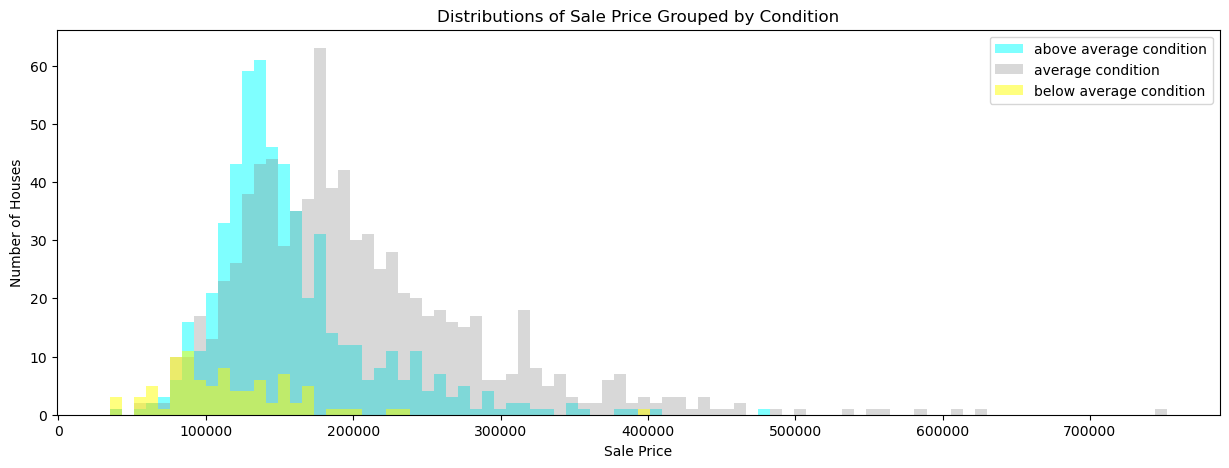

In [25]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [28]:
# Replace None with appropriate text
"""
The largest number of houses under the above_average_condition was approximately 62 at approximately 140,000 dollars;
The largest number of houses under the average_condition was approximately 65 at approximately 180,000 dollars;
The largest number of houses under the below_average_condition was approximately 10 at approximately 80,000 dollars.

The 3 overall condition categories i.e. below_average_condition, average_condition and above_average_condition in 
relation to the sale price are skewed to the right(positive skewness).

Both the 3 conditions have outlier sale prices. For instance, 
a) The average condition had a few houses with a sale price of approximately 750,000 dollars with the least price 
being approximately 100,000 dollars.
b) The above_average condition had a few houses with a sale price of approximately 480,000 dollars with the least price 
being approximately 50,000 dollars.
c) The below_average condition had a few houses with a sale price range of 380,000 - 400,000 dollars with the 
least price being approximately 50,000 dollars.

The cheapest sale price at approximately 40,000 - 50,000 dollars was of both above_average_condition and 
below_average_condition.

"""

'\nThe largest number of houses under the above_average_condition was approximately 62 at approximately 140,000 dollars;\nThe largest number of houses under the average_condition was approximately 65 at approximately 180,000 dollars;\nThe largest number of houses under the below_average_condition was approximately 10 at approximately 80,000 dollars.\n\nThe 3 overall condition categories i.e. below_average_condition, average_condition and above_average_condition in \nrelation to the sale price are skewed to the right(positive skewness).\n\nBoth the 3 conditions have outlier sale prices. For instance, \na) The average condition had a few houses with a sale price of approximately 750,000 dollars with the least price \nbeing approximately 100,000 dollars.\nb) The above_average condition had a few houses with a sale price of approximately 480,000 dollars with the least price \nbeing approximately 50,000 dollars.\nc) The below_average condition had a few houses with a sale price range of 380

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [84]:
# Your code here
# Importing numpy for correlation
# SalePrice is the most positively correlated to OverallQual at 0.79.

import numpy as np

correlation11 = np.corrcoef(df['TotRmsAbvGrd'], df['SalePrice'])
correlation11[0][1]

correlation22 = np.corrcoef(df['OverallCond'], df['SalePrice'])
correlation22[0][1]

correlation33 = np.corrcoef(df['LotArea'], df['SalePrice'])
correlation33[0][1]

correlation44 = np.corrcoef(df['OverallQual'], df['SalePrice'])
correlation44[0][1]

correlation55 = np.corrcoef(df['GrLivArea'], df['SalePrice'])
correlation55[0][1]

0.7086244776126522

Now, find the ***most negatively correlated*** column:

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_16916\2230100428.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr = df.corr()


<Axes: >

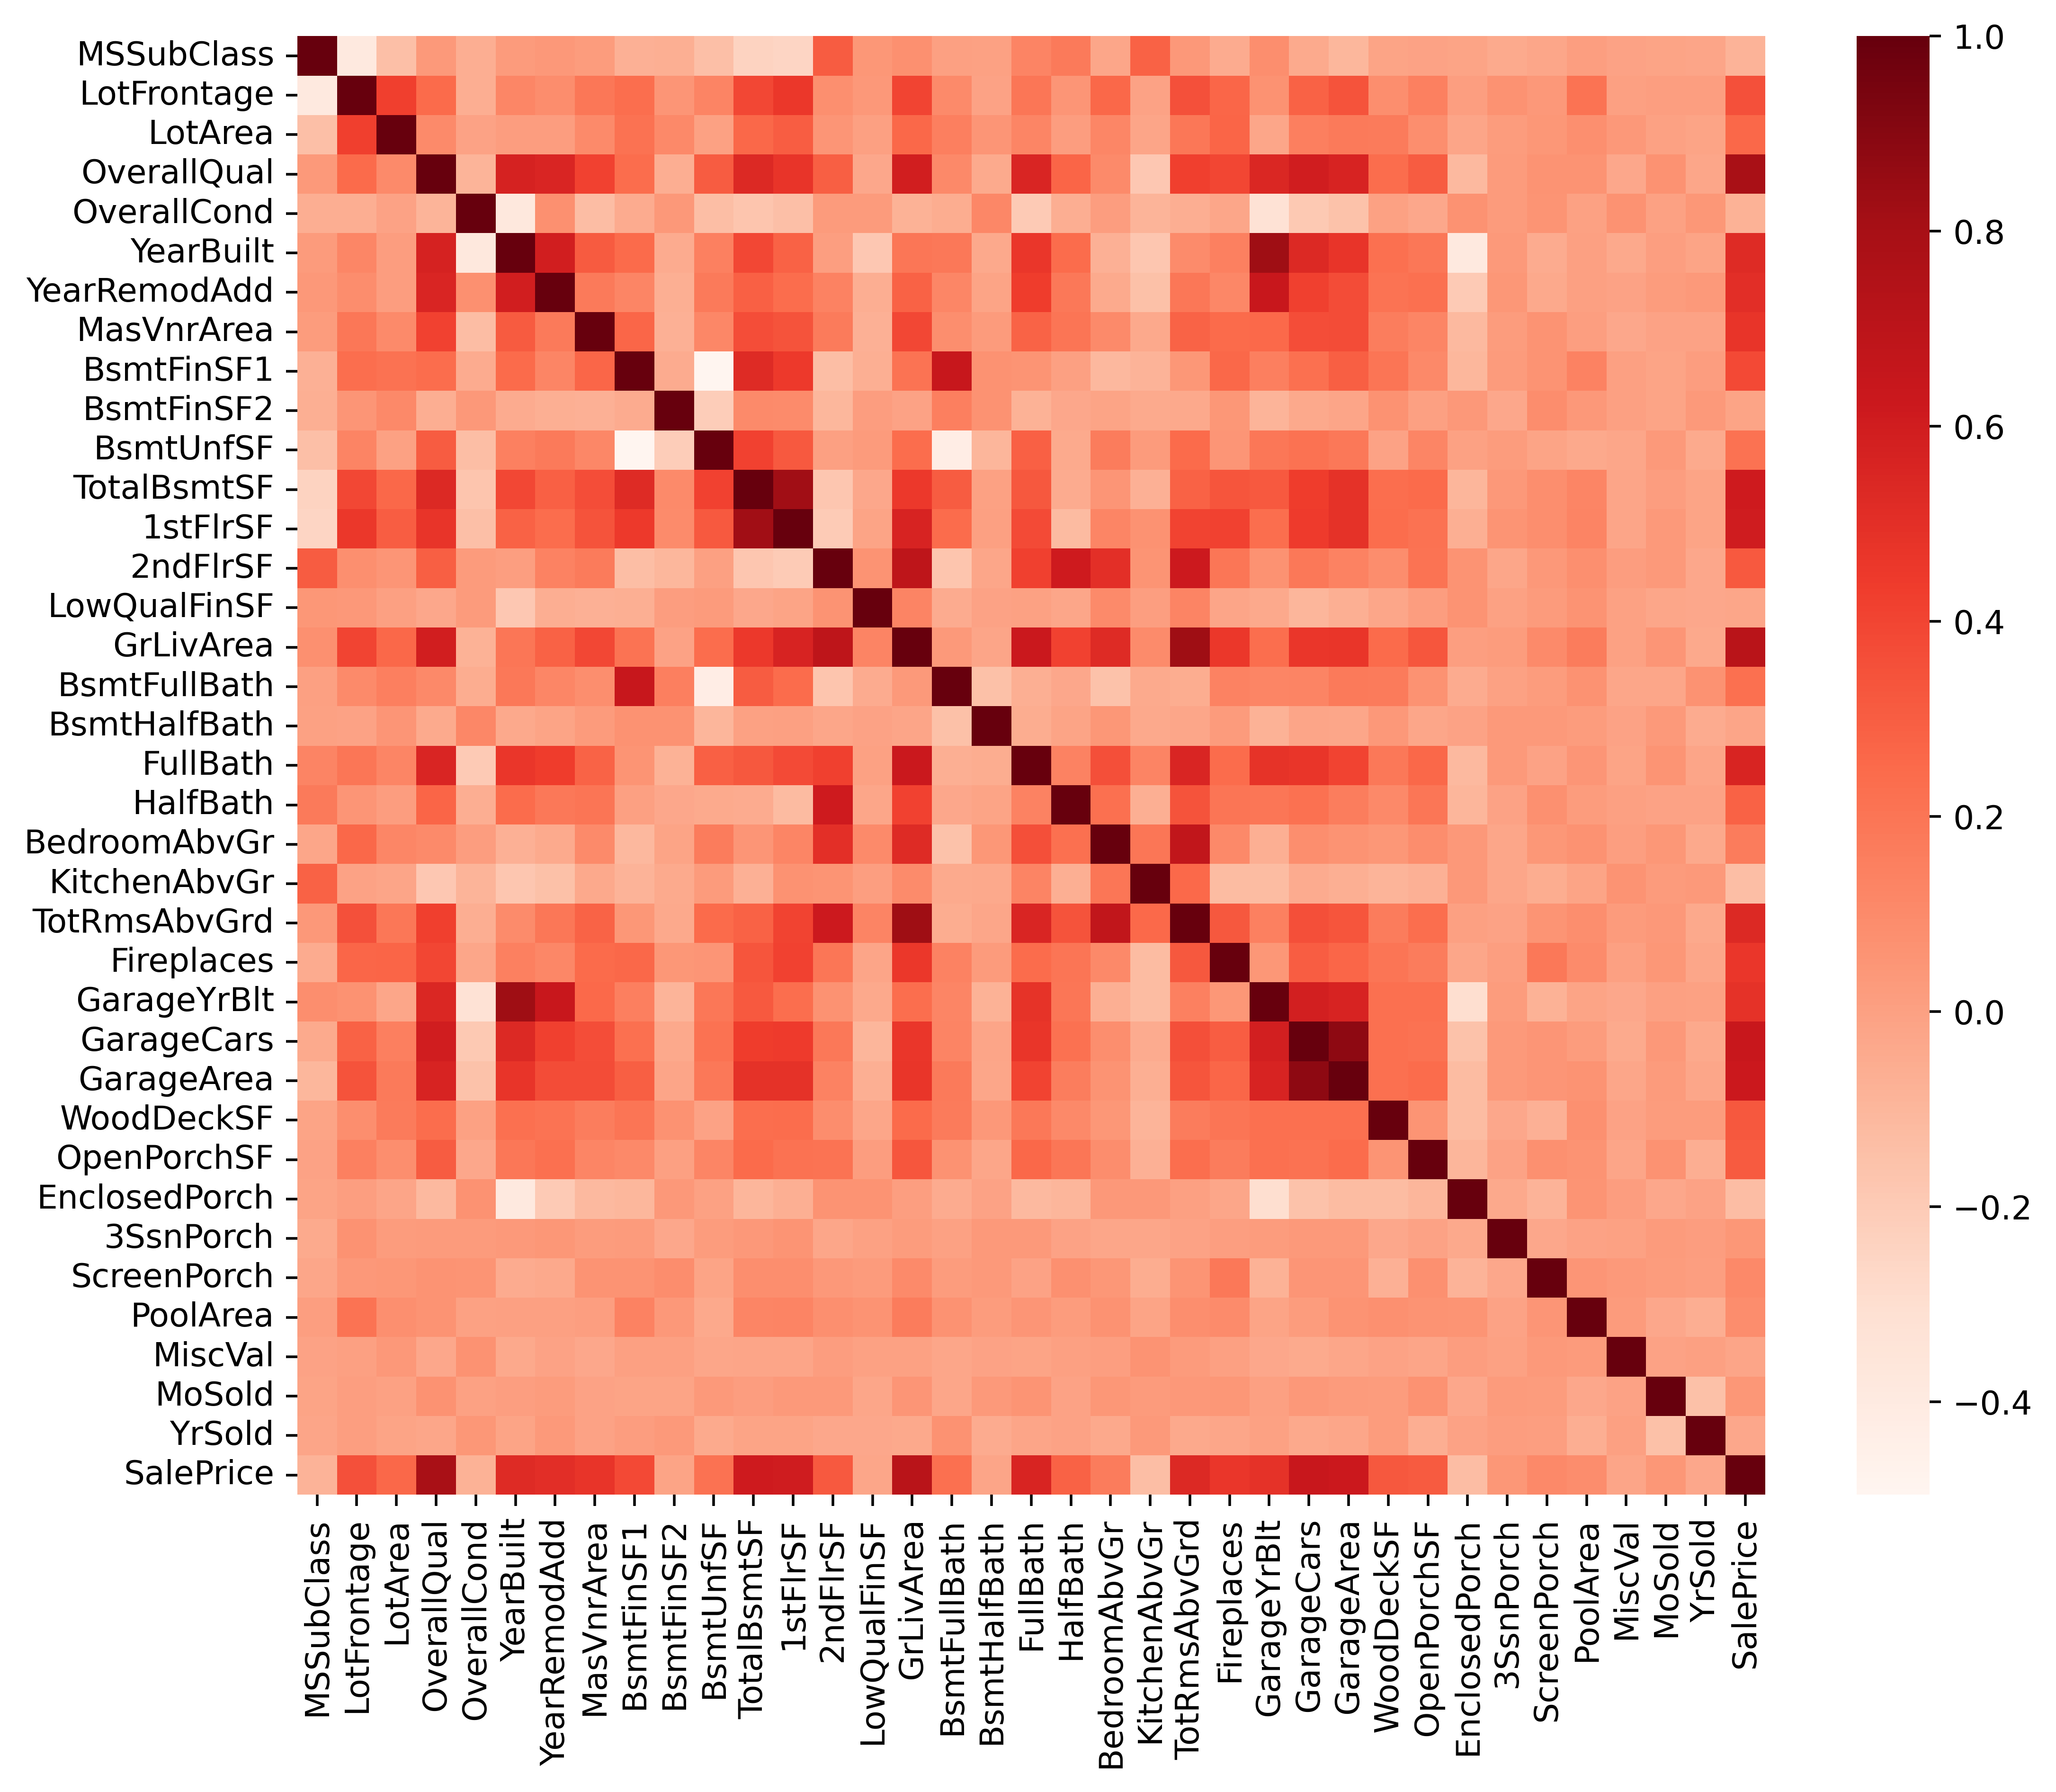

In [74]:
#Correlation Heat Map

import seaborn as sb
dfCorr = df.corr()
#filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.5))]
plt.figure(figsize=(10,8), dpi =500)
sb.heatmap(dfCorr, cmap="Reds", annot=False)

In [90]:
# Your code here
# SalePrice is the most negatively correlated to KitchenAbvGr at -0.13

correlation66 = np.corrcoef(df['KitchenAbvGr'], df['SalePrice'])
correlation66[0][1]

correlation77 = np.corrcoef(df['EnclosedPorch'], df['SalePrice'])
correlation77[0][1]

-0.1285779579259565

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

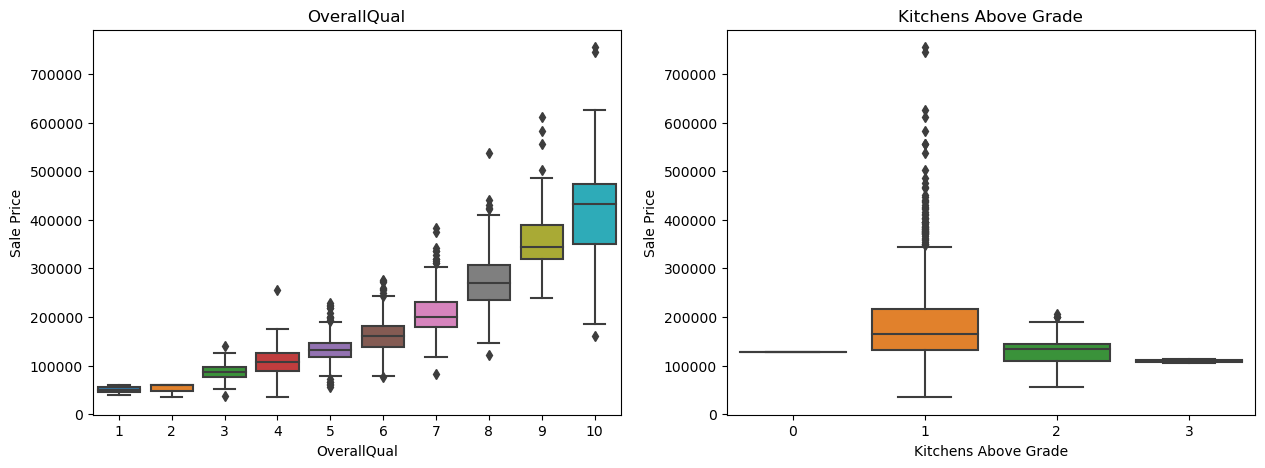

In [93]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["OverallQual"],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('OverallQual')
ax1.set_xlabel('OverallQual')
ax1.set_ylabel("Sale Price")
ax2.set_title('Kitchens Above Grade')
ax2.set_xlabel('Kitchens Above Grade')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [95]:
# Replace None with appropriate text
"""
# Overall Qual
The highest OverallQual (overall material and finish of the house) had a median sale price of approximately 45,000 dollars
while the lowest OverallQual had a median sale price of approximately 5,000 dollars. This means OverallQual had the highest
sale price.

The excellent overall material and finish of the house had the largest interquartile range of sale pricewhile the very poor 
overallqual had the smallest interquartile of sale price.

Overall Qual from 3 to 10; had outlier sale prices.

# Kitchens Above Grade
Kitchens above grade of 1 had the highest sale price with the highest median price of approximately 18,000 dollars. This
same grade also had outliers and the largest interquartile range of sale price.

Kitchens of Grade 0 had the smallest interquartile range while kitchens of grade 3 had the lowest sale median sale price.




"""

'\n# Overall Qual\nThe highest OverallQual (overall material and finish of the house) had a median sale price of approximately 45,000 dollars\nwhile the lowest OverallQual had a median sale price of approximately 5,000 dollars. This means OverallQual had the highest\nsale price.\n\nThe excellent overall material and finish of the house had the largest interquartile range of sale pricewhile the very poor \noverallqual had the smallest interquartile of sale price.\n\nOverall Qual from 3 to 10; had outlier sale prices.\n\n# Kitchens Above Grade\nKitchens above grade of 1 had the highest sale price with the highest median price of approximately 18,000 dollars. This\nsame grade also had outliers and the largest interquartile range of sale price.\n\nKitchens of Grade 0 had the smallest interquartile range while kitchens of grade 3 had the lowest sale median sale price.\n\n\n\n\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [96]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

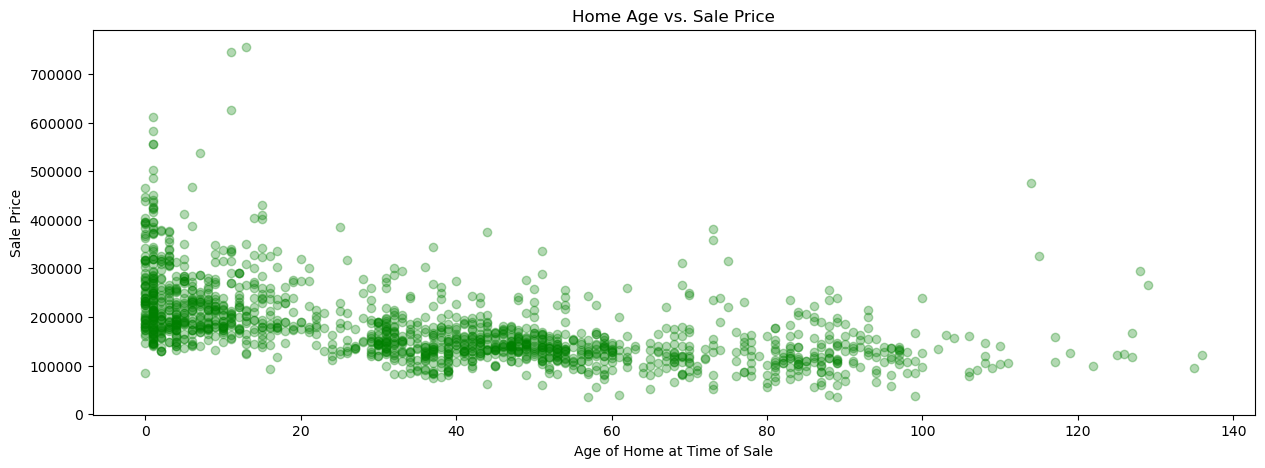

In [104]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]


# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [105]:
# Replace None with appropriate text
"""
There seems to be a negative relationship between sale price and age of home at time of sale; whereby as sale price increases,
the age of home at time of sale decreases and vice versa.

There also seems to be outliers i.e sale price of approximately 78,000 dollars in the 18-20 year range and 
sale price of approximately 50,000 dollars in the 115-120 year range

The oldest houses in comparison to the year built and year sold were the least in number with sale prices of approximately 
less than 20,000 dollars.

The highest house sale price was in the 18 - 20 year age range at time of sale. Approximately 78,000 dollars;
while the lowest house sale price was in the 90 - 100 year age range at time of sale. Approximately 10,000 dollars.

The mean age of home at time of sale was in the 35-40 range. 

"""

'\nThere seems to be a negative relationship between sale price and age of home at time of sale; whereby as sale price increases,\nthe age of home at time of sale decreases and vice versa.\n\nThe oldest houses in comparison to the year built and year sold were the least in number with sale prices of approximately \nless than 20,000 dollars.\n\nThe highest house sale price was in the 18 - 20 year age range at time of sale. Approximately 78,000 dollars;\nwhile the lowest house sale price was in the 90 - 100 year age range at time of sale. Approximately 10,000 dollars.\n\nThe mean age of home at time of sale was in the 35-40 range. \n\n\n\n\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.